In [1]:
import os
from textblob import TextBlob
import matplotlib.pyplot as plt
import string
import nltk.corpus
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

## Importing all text files with filename

In [2]:
MfileNameList = []
for i in os.walk('.'):
    fileNameList.extend(i)

In [3]:
fileNameList = [fileNameList[0]+ "\\" + i for i in fileNameList[2] if '.txt' in i]

In [4]:
fileNameList

['.\\Bush_1989.txt',
 '.\\Bush_1990.txt',
 '.\\Bush_1991.txt',
 '.\\Bush_1992.txt',
 '.\\Bush_2001.txt',
 '.\\Bush_2002.txt',
 '.\\Bush_2003.txt',
 '.\\Bush_2004.txt',
 '.\\Bush_2005.txt',
 '.\\Bush_2006.txt',
 '.\\Bush_2007.txt',
 '.\\Bush_2008.txt',
 '.\\Clinton_1993.txt',
 '.\\Clinton_1994.txt',
 '.\\Clinton_1995.txt',
 '.\\Clinton_1996.txt',
 '.\\Clinton_1997.txt',
 '.\\Clinton_1998.txt',
 '.\\Clinton_1999.txt',
 '.\\Clinton_2000.txt',
 '.\\Obama_2009.txt',
 '.\\Obama_2010.txt',
 '.\\Obama_2011.txt',
 '.\\Obama_2012.txt',
 '.\\Obama_2013.txt',
 '.\\Obama_2014.txt',
 '.\\Obama_2015.txt',
 '.\\Obama_2016.txt',
 '.\\Trump_2017.txt']

In [5]:
def FileText(filename):
    file = open(filename, 'r')
    split = filename.split('.')[1][1:].split('_')
    year = split[1]
    name = split[0]
    text = file.read()
    return text, name, year

In [6]:
text, name, year = FileText('.\\Clinton_1993.txt')

In [7]:
clintonWordList = []
BushWordList = []
ObamaWordList = []
trumpWordList = []
bushfilecount = 0
obamafilecount = 0
clintonfilecount = 0
trumpfilecount = 0

In [8]:
def FilterText(name, text):
    global clintonWordList, BushWordList, ObamaWordList, trumpWordList
    global bushfilecount, clintonfilecount, obamafilecount, trumpfilecount
    stopwords = nltk.corpus.stopwords.words('english')
    WordList = []
    text = text.lower().decode('utf8')
    for i in text.split():
        if not i in stopwords + ['mr.', 'must', 'also', 'us', 'it.', '-', ' ']:
            WordList.append(i)
    filteredText = " ".join(i for i in WordList)
    if ('Clinton' in name):
        clintonWordList.extend(WordList)
        clintonfilecount += 1
    elif ('Obama' in name):
        ObamaWordList.extend(WordList)
        obamafilecount += 1
    elif ('Bush' in name):
        BushWordList.extend(WordList)
        bushfilecount += 1
    else:
        trumpWordList.extend(WordList)
        trumpfilecount += 1
        
    return filteredText

In [9]:
filterText = FilterText('Clinton', text)

In [10]:
def SentimentValue(text):
    tx = TextBlob(text)
    polarity = tx.sentiment.polarity
    subject = tx.sentiment.subjectivity
    return {'polarity':polarity, 'subjectivity': subject}

In [11]:
SentimentValue(filterText)

{'polarity': 0.10131817606917212, 'subjectivity': 0.3789009905543775}

In [12]:
def CreateDataFrame():
    global fileNameList
    nameList = []
    yearList = []
    polarityList = []
    subjectList = []
    for i in fileNameList:
        text, name , year = FileText(i)
        nameList.append(name)
        yearList.append(year)
        text = FilterText(name, text)
        sentiment = SentimentValue(text)
        polarityList.append(sentiment['polarity'])
        subjectList.append(sentiment['subjectivity'])
        
    data = pd.DataFrame({'File Name': fileNameList, 'Name': nameList, 'Year': yearList, 'Sentiment': polarityList, 
                  'Subjectivity' : subjectList})
    return data

In [13]:
df = CreateDataFrame()

In [14]:
df

,File Name,Name,Sentiment,Subjectivity,Year
0,.\Bush_1989.txt,Bush,0.143428,0.446513,1989
1,.\Bush_1990.txt,Bush,0.145849,0.436253,1990
2,.\Bush_1991.txt,Bush,0.085759,0.441624,1991
3,.\Bush_1992.txt,Bush,0.099917,0.428110,1992
4,.\Bush_2001.txt,Bush,0.167677,0.433277,2001
5,.\Bush_2002.txt,Bush,0.173048,0.485860,2002
6,.\Bush_2003.txt,Bush,0.110028,0.453897,2003
7,.\Bush_2004.txt,Bush,0.123810,0.457913,2004
8,.\Bush_2005.txt,Bush,0.152486,0.440903,2005
9,.\Bush_2006.txt,Bush,0.115546,0.412868,2006


In [15]:
bushCount = Counter(BushWordList)
clintonCount = Counter(clintonWordList)
obamaCount = Counter(ObamaWordList)
trumpCount = Counter(trumpWordList)

# Finding Most frequent Words from every Politician
<ul><b>
<li>George W Bush</li>
<li>Hillary Clinton</li>
<li>Brack Obama</li>
<li>Donald Trump</li></b>
</ul>

# Clinton Word frequency plot

In [16]:
clintonCount.most_common(20)

[(u'people', 312),
 (u'new', 292),
 (u'every', 219),
 (u'make', 197),
 (u'american', 194),
 (u'\u2014', 172),
 (u'work', 171),
 (u'one', 153),
 (u'congress', 148),
 (u'ask', 141),
 (u'last', 140),
 (u'health', 138),
 (u'america', 134),
 (u'help', 133),
 (u'years', 127),
 (u'americans', 125),
 (u'say', 124),
 (u'know', 122),
 (u'care', 121),
 (u'want', 116)]

In [17]:
labels, values = zip(*clintonCount.most_common(35))
fig, ax = plt.subplots(figsize = (18,5))

labels = np.array(labels)
values = np.array(values)

indexes = np.arange(len(labels))
s = ax.bar(indexes, values, facecolor=[1,1,0,0.6], edgecolor='black', width = 0.8, linewidth = 2)
ax.set_xticks(indexes)
twentyfive, seventyfive = np.percentile(values, [25,75])

for value, patch in zip(values,s.patches):
    if (value < twentyfive):
        patch.set_facecolor([1,0,0,0.6])
        patch.set_edgecolor('black')
    elif (value > seventyfive):
        patch.set_facecolor('lightgreen')
        patch.set_edgecolor('black')
    else:
        patch.set_edgecolor('black')

ax.set_xticklabels(labels)

plt.xticks(rotation = 50, fontsize = 12)
red_patch = mpatches.Patch(color='red', label='Less Frequent Words')
yellow_patch = mpatches.Patch(color='yellow', label='Frequent Words')
green_patch =  mpatches.Patch(color='lightgreen', label='Very Frequent Words')
plt.legend(handles=[red_patch, yellow_patch, green_patch], fontsize = 15)


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

font_title = {'family': 'Arial',
        'color':  'darkgreen',
        'weight': 'bold',
        'size': 25,
        }
plt.xlabel('Words', fontdict = font)
plt.ylabel('Frequency', fontdict = font)
plt.title('Word Frequency Graph of Hillary Clinton', fontdict = font_title)

Text(0.5,1,u'Word Frequency Graph of Hillary Clinton')

In [18]:
word, count = zip(*sorted(clintonCount.most_common(35)))

Text(0.5,1,u"Clinton's Word Frequency over 9 speech")

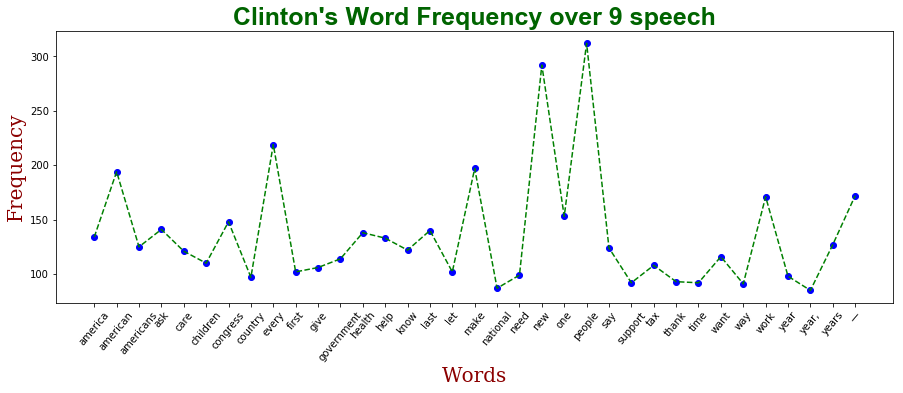

In [19]:
%matplotlib inline
plt.figure(figsize =(15,5))
plt.plot(word, count, 'bo', word,count, 'g--')
plt.xticks(rotation = 50)
plt.xlabel('Words', fontdict =font)
plt.ylabel('Frequency', fontdict = font)
plt.title('Clinton\'s Word Frequency over %d speech'%clintonfilecount, fontdict = font_title)

# Sentiment and Subjectivity of Clinton's Speech

Text(0.5,1,u'\n\nLine graph')

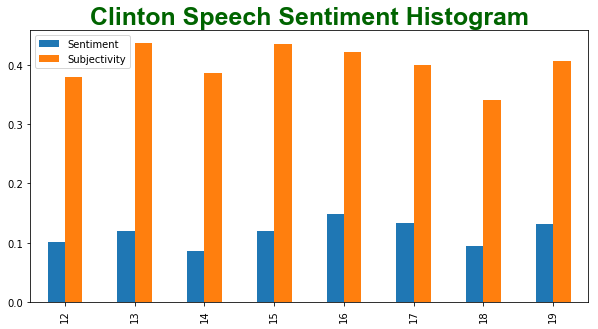

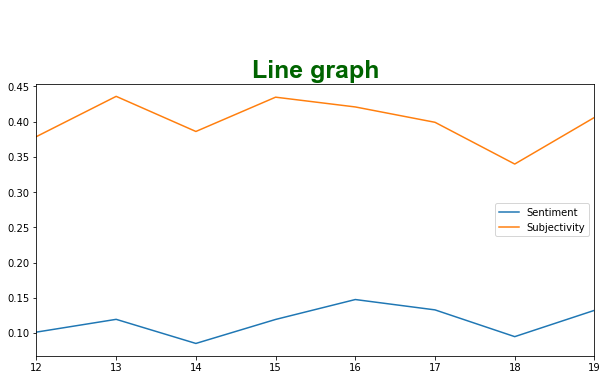

In [20]:
clinton_data = df[df['Name'] == 'Clinton']
clinton_data.plot.bar(figsize = (10,5))
plt.title('Clinton Speech Sentiment Histogram', fontdict = font_title)
clinton_data.plot(figsize = (10,5))
plt.title('\n\nLine graph', fontdict = font_title)

# Goerge W. Bush Word Frequency Plot

In [21]:
bushCount.most_common(20)

[(u'america', 209),
 (u'\u2014', 185),
 (u'new', 180),
 (u'people', 165),
 (u'american', 151),
 (u'every', 125),
 (u'help', 124),
 (u'one', 123),
 (u'make', 121),
 (u'world', 116),
 (u'nation', 97),
 (u'health', 97),
 (u'congress', 93),
 (u'tax', 91),
 (u'government', 90),
 (u'work', 88),
 (u'americans', 88),
 (u'security', 85),
 (u'great', 80),
 (u'need', 79)]

Text(0.5,1,u'Word Frequency Graph of George Bush')

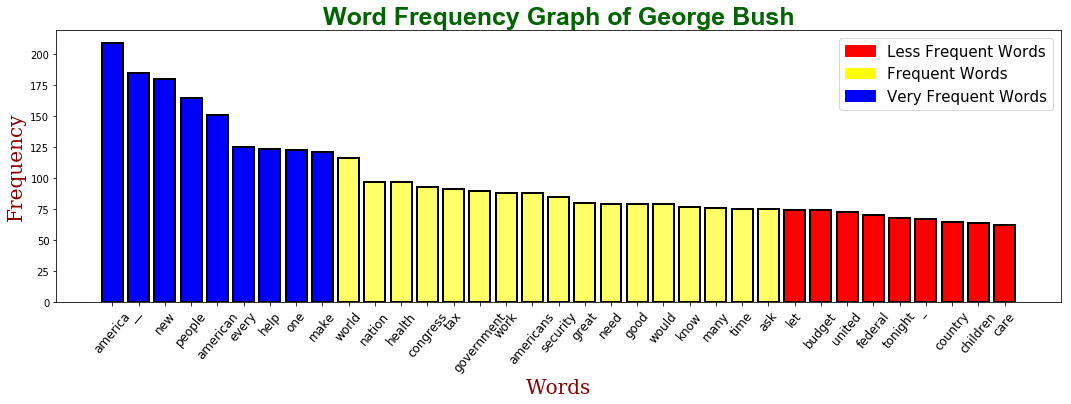

In [43]:
labels, values = zip(*bushCount.most_common(35))
fig, ax = plt.subplots(figsize = (18,5))

labels = np.array(labels)
values = np.array(values)

indexes = np.arange(len(labels))
s = ax.bar(indexes, values, facecolor=[1,1,0,0.6], edgecolor='black', width = 0.8, linewidth = 2)
ax.set_xticks(indexes)
twentyfive, seventyfive = np.percentile(values, [25,75])

for value, patch in zip(values,s.patches):
    if (value < twentyfive):
        patch.set_facecolor('red')
        patch.set_edgecolor('black')
    elif (value > seventyfive):
        patch.set_facecolor('blue')
        patch.set_edgecolor('black')
    else:
        patch.set_edgecolor('black')

ax.set_xticklabels(labels)

plt.xticks(rotation = 50, fontsize = 12)
red_patch = mpatches.Patch(color='red', label='Less Frequent Words')
yellow_patch = mpatches.Patch(color='yellow', label='Frequent Words')
green_patch =  mpatches.Patch(color='blue', label='Very Frequent Words')
plt.legend(handles=[red_patch, yellow_patch, green_patch], fontsize = 15)


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

font_title = {'family': 'Arial',
        'color':  'darkgreen',
        'weight': 'bold',
        'size': 25,
        }
plt.xlabel('Words', fontdict = font)
plt.ylabel('Frequency', fontdict = font)
plt.title('Word Frequency Graph of George Bush', fontdict = font_title)

In [23]:
word, count = zip(*sorted(bushCount.most_common(35)))

Text(0.5,1,u"Goerge Bush's Word Frequency over 12 speech")

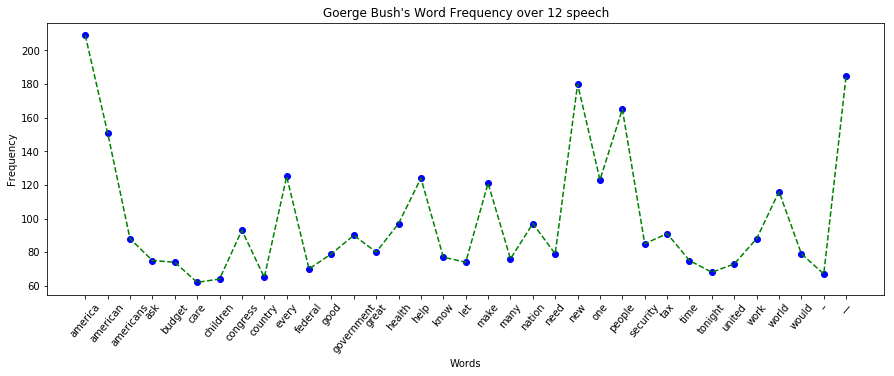

In [24]:
%matplotlib inline
plt.figure(figsize =(15,5))
plt.plot(word, count, 'bo', word,count, 'g--')
plt.xticks(rotation = 50)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Goerge Bush\'s Word Frequency over %d speech'%bushfilecount)

# Sentiment and Subjectivity Graphs

Text(0.5,1,u'\n\nLine graph')

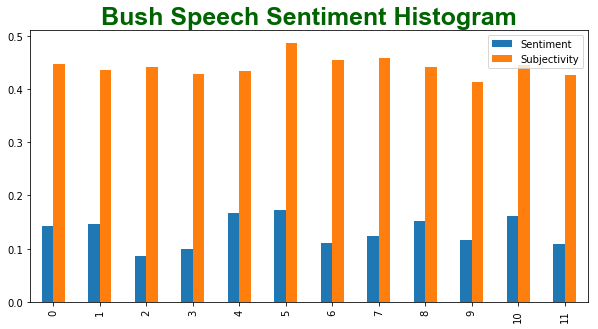

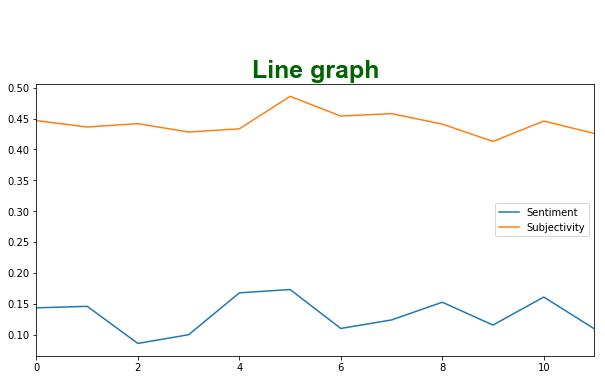

In [25]:
bush_data = df[df['Name'] == 'Bush']
bush_data.plot.bar(figsize = (10,5))
plt.title('Bush Speech Sentiment Histogram', fontdict = font_title)
bush_data.plot(figsize = (10,5))
plt.title('\n\nLine graph', fontdict = font_title)

# Barack Obama Word Frequency Plot

In [26]:
obamaCount.most_common(20)

[(u'new', 211),
 (u'american', 166),
 (u'\u2013', 153),
 (u'people', 147),
 (u'make', 145),
 (u'every', 140),
 (u'one', 136),
 (u'work', 130),
 (u'jobs', 126),
 (u'america', 124),
 (u'like', 115),
 (u'americans', 107),
 (u'get', 106),
 (u'know', 105),
 (u'need', 97),
 (u"that's", 97),
 (u'time', 88),
 (u'right', 87),
 (u'help', 85),
 (u'last', 84)]

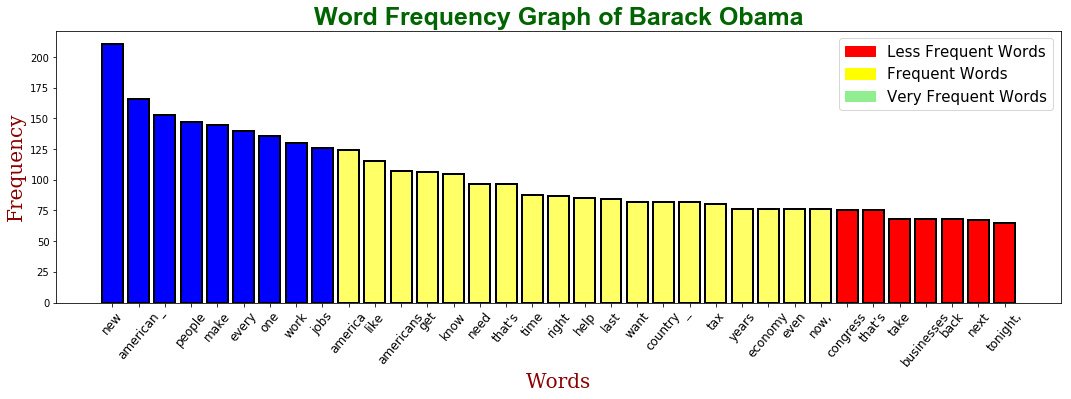

In [40]:
labels, values = zip(*obamaCount.most_common(35))
fig, ax = plt.subplots(figsize = (18,5))

labels = np.array(labels)
values = np.array(values)

indexes = np.arange(len(labels))
s = ax.bar(indexes, values, facecolor=[1,1,0,0.6], edgecolor='black', width = 0.8, linewidth = 2)
ax.set_xticks(indexes)
twentyfive, seventyfive = np.percentile(values, [25,75])

for value, patch in zip(values,s.patches):
    if (value < twentyfive):
        patch.set_facecolor('red')
        patch.set_edgecolor('black')
    elif (value > seventyfive):
        patch.set_facecolor('blue')
        patch.set_edgecolor('black')
    else:
        patch.set_edgecolor('black')

ax.set_xticklabels(labels)

plt.xticks(rotation = 50, fontsize = 12)

red_patch = mpatches.Patch(color='red', label='Less Frequent Words')
yellow_patch = mpatches.Patch(color='yellow', label='Frequent Words')
green_patch =  mpatches.Patch(color='lightgreen', label='Very Frequent Words')
plt.legend(handles=[red_patch, yellow_patch, green_patch], fontsize = 15)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

font_title = {'family': 'Arial',
        'color':  'darkgreen',
        'weight': 'bold',
        'size': 25,
        }
plt.xlabel('Words', fontdict = font)
plt.ylabel('Frequency', fontdict = font)
plt.title('Word Frequency Graph of Barack Obama', fontdict = font_title)
print

In [28]:
word, count = zip(*sorted(obamaCount.most_common(35)))

Text(0.5,1,u"Barack Obama's Word Frequency over 8 speech")

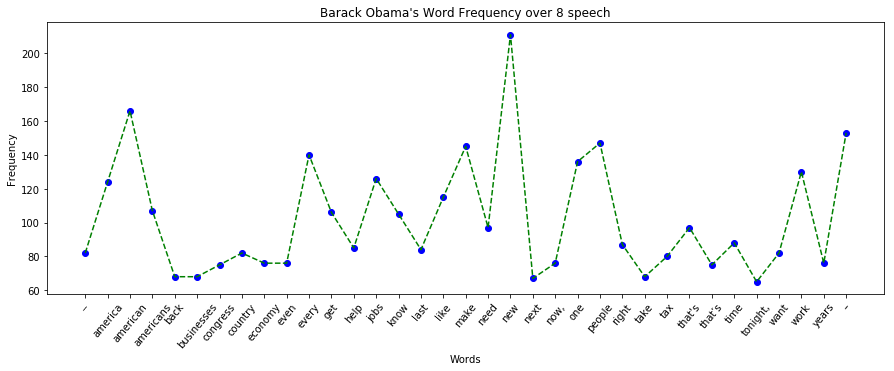

In [29]:
%matplotlib inline
plt.figure(figsize =(15,5))
plt.plot(word, count, 'bo', word,count, 'g--')
plt.xticks(rotation = 50)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Barack Obama\'s Word Frequency over %d speech'%obamafilecount)

# Sentimental and Subjectivity graph 

Text(0.5,1,u'\n\nLine graph')

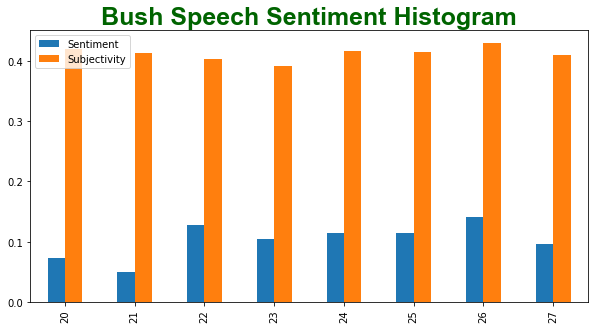

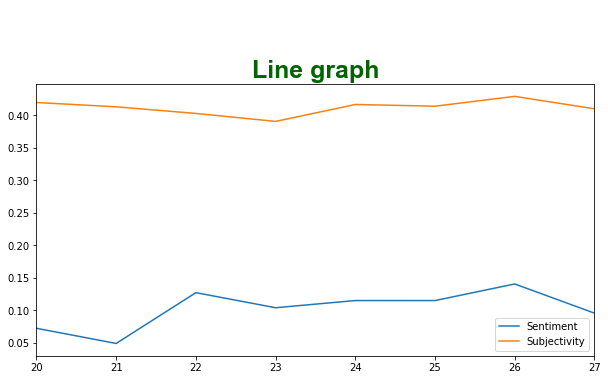

In [30]:
obama_data = df[df['Name'] == 'Obama']
obama_data.plot.bar(figsize = (10,5))
plt.title('Bush Speech Sentiment Histogram', fontdict = font_title)
obama_data.plot(figsize = (10,5))
plt.title('\n\nLine graph', fontdict = font_title)

# Donald Trump Word Frequency Plot

In [31]:
trumpCount.most_common(20)

[(u'american', 32),
 (u'america', 20),
 (u'new', 18),
 (u'united', 14),
 (u'one', 13),
 (u'great', 13),
 (u'many', 12),
 (u'country', 11),
 (u'americans', 11),
 (u'every', 10),
 (u'people', 10),
 (u'across', 10),
 (u'work', 9),
 (u'thank', 9),
 (u'nation', 9),
 (u'want', 8),
 (u'citizens', 8),
 (u"we've", 8),
 (u'since', 8),
 (u'health', 8)]

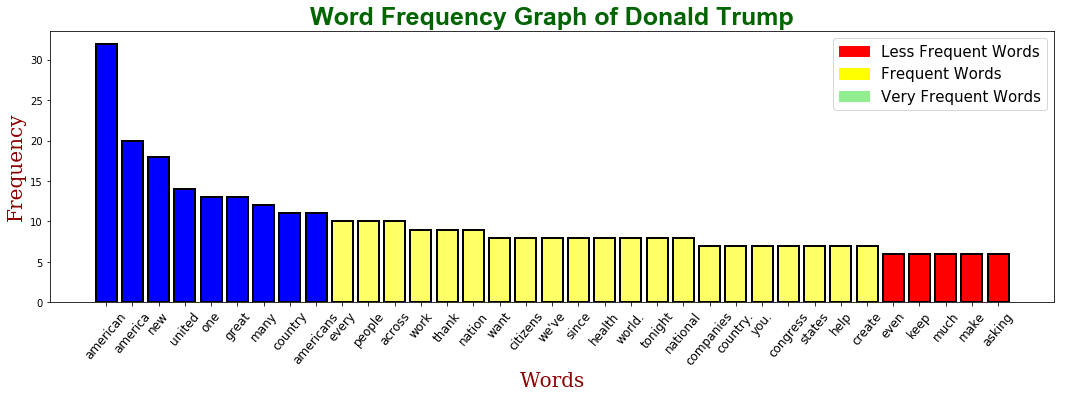

In [39]:
labels, values = zip(*trumpCount.most_common(35))
fig, ax = plt.subplots(figsize = (18,5))

labels = np.array(labels)
values = np.array(values)

indexes = np.arange(len(labels))
s = ax.bar(indexes, values, facecolor=[1,1,0,0.6], edgecolor='black', width = 0.8, linewidth = 2)
ax.set_xticks(indexes)
twentyfive, seventyfive = np.percentile(values, [25,75])

for value, patch in zip(values,s.patches):
    if (value < twentyfive):
        patch.set_facecolor('red')
        patch.set_edgecolor('black')
    elif (value > seventyfive):
        patch.set_facecolor('blue')
        patch.set_edgecolor('black')
    else:
        patch.set_edgecolor('black')

ax.set_xticklabels(labels)

plt.xticks(rotation = 50, fontsize = 12)
red_patch = mpatches.Patch(color='red', label='Less Frequent Words')
yellow_patch = mpatches.Patch(color='yellow', label='Frequent Words')
green_patch =  mpatches.Patch(color='lightgreen', label='Very Frequent Words')
plt.legend(handles=[red_patch, yellow_patch, green_patch], fontsize = 15)


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

font_title = {'family': 'Arial',
        'color':  'darkgreen',
        'weight': 'bold',
        'size': 25,
        }
plt.xlabel('Words', fontdict = font)
plt.ylabel('Frequency', fontdict = font)
plt.title('Word Frequency Graph of Donald Trump', fontdict = font_title)
print

In [33]:
word, count = zip(*sorted(trumpCount.most_common(35)))

Text(0.5,1,u"Donald Trump's Word Frequency over 8 speech")

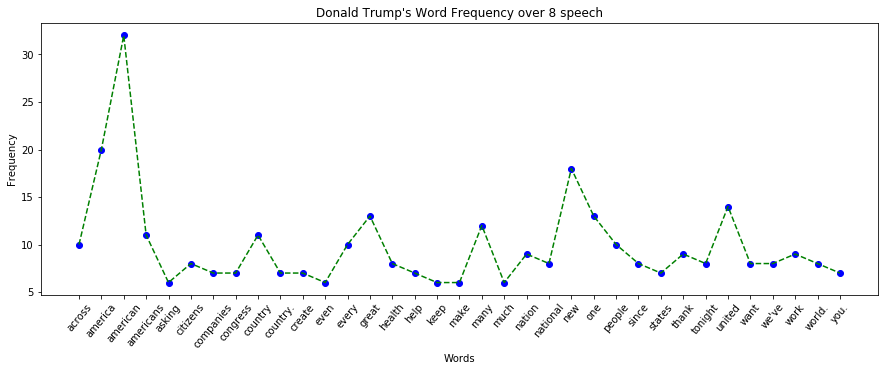

In [34]:
%matplotlib inline
plt.figure(figsize =(15,5))
plt.plot(word, count, 'bo', word,count, 'g--')
plt.xticks(rotation = 50)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Donald Trump\'s Word Frequency over %d speech'%obamafilecount)

# Sentiment and Subjectivity Graph

Text(0.5,1,u'Trump Speech Sentiment Histogram')

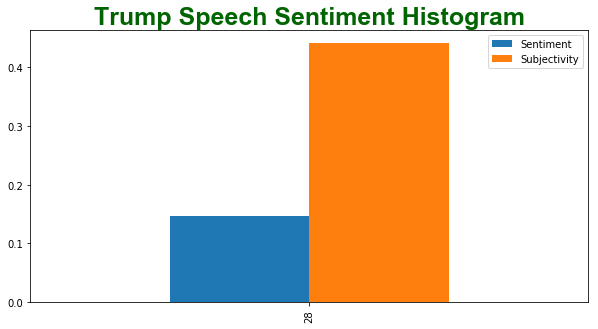

In [38]:
trump_Data = df[df['Name'] == 'Trump']
trump_Data.plot.bar(figsize = (10,5), width = 0.5)
plt.title('Trump Speech Sentiment Histogram', fontdict = font_title)